In [108]:
# Step 1: Install the Kaggle API
!pip install kaggle

# Step 2: Download the dataset from Kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'your_username'  # Replace 'your_username' with your Kaggle username
os.environ['KAGGLE_KEY'] = 'your_api_key'  # Replace 'your_api_key' with your Kaggle API key

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [109]:
# Step 3: Extract the downloaded dataset
import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [110]:
# Step 4: Preprocessing and understanding of the data
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [111]:
# Define directories
train_dir = 'data/chest_xray/train'
test_dir = 'data/chest_xray/test'
val_dir = 'data/chest_xray/val'


In [112]:
# Count the number of images in each class
normal_train_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
pneumonia_train_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
normal_test_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
pneumonia_test_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
normal_val_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
pneumonia_val_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))

print("Training data:")
print("Number of normal images:", normal_train_count)
print("Number of pneumonia images:", pneumonia_train_count)
print("\nTesting data:")
print("Number of normal images:", normal_test_count)
print("Number of pneumonia images:", pneumonia_test_count)
print("\nValidation data:")
print("Number of normal images:", normal_val_count)
print("Number of pneumonia images:", pneumonia_val_count)


Training data:
Number of normal images: 1341
Number of pneumonia images: 3875

Testing data:
Number of normal images: 234
Number of pneumonia images: 390

Validation data:
Number of normal images: 8
Number of pneumonia images: 8


In [113]:
import os
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [114]:
# Balance the classes
ros = RandomOverSampler(sampling_strategy='auto')
train_images = []
train_labels = []
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    class_images = [os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir)]
    class_labels = [class_name] * len(class_images)
    train_images.extend(class_images)
    train_labels.extend(class_labels)


In [115]:
train_images_resampled, train_labels_resampled = ros.fit_resample(np.array(train_images).reshape(-1, 1), train_labels)
train_images_resampled = train_images_resampled.flatten()


In [116]:
# Shuffle the data
resampled_data = list(zip(train_images_resampled, train_labels_resampled))
np.random.shuffle(resampled_data)
train_images_resampled, train_labels_resampled = zip(*resampled_data)


In [117]:
# Create DataFrame with filenames and labels
train_data = {"filename": train_images_resampled, "class": train_labels_resampled}
train_df = pd.DataFrame(train_data)


In [118]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [119]:
# Data preprocessing
batch_size = 32
target_size = (224, 224)


In [120]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=None,
    x_col="filename",
    y_col="class",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 6200 validated image filenames belonging to 2 classes.


In [121]:
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=None,
    x_col="filename",
    y_col="class",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1550 validated image filenames belonging to 2 classes.


In [122]:
# Create data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


In [123]:
import matplotlib.pyplot as plt

# Display sample images and labels
def show_samples(generator, class_names, num_samples=5):
    plt.figure(figsize=(10, 10))
    for images, labels in generator.take(1):
        for i in range(num_samples):
            ax = plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i])
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
    plt.show()


In [124]:
# Display the shape of data and labels
def show_shape(generator):
    for data_batch, labels_batch in generator:
        print("Data batch shape:", data_batch.shape)
        print("Labels batch shape:", labels_batch.shape)
        break

In [125]:
# Display the shape of data and labels
def show_shape(generator):
    for data_batch, labels_batch in generator:
        print("Data batch shape:", data_batch.shape)
        print("Labels batch shape:", labels_batch.shape)
        break

In [126]:

# Preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [127]:

# Create balanced dataset
train_balanced_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=None,
    x_col="filename",
    y_col="class",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 6200 validated image filenames belonging to 2 classes.


Sample images and labels before augmentation:


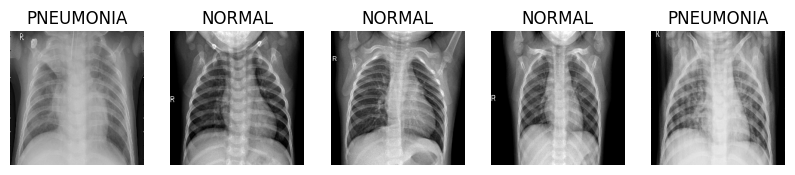

In [128]:
import matplotlib.pyplot as plt

# Display sample images and labels
def show_samples(generator, class_names, num_samples=5):
    plt.figure(figsize=(10, 10))
    for images, labels in generator:
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i])
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
        break  # Stop after displaying one batch
    plt.show()

# Display sample images and labels before augmentation
print("Sample images and labels before augmentation:")
show_samples(train_generator, class_names=['NORMAL', 'PNEUMONIA'])



Sample images and labels after augmentation:


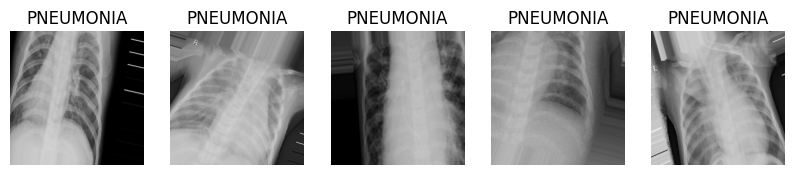

In [129]:
# Display sample images and labels after augmentation
print("\nSample images and labels after augmentation:")
show_samples(train_balanced_generator, class_names=['NORMAL', 'PNEUMONIA'])


In [130]:

# Display the shape of data and labels after augmentation
print("\nShape of data and labels after augmentation:")
show_shape(train_balanced_generator)


Shape of data and labels after augmentation:
Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)


Visualization of training data:


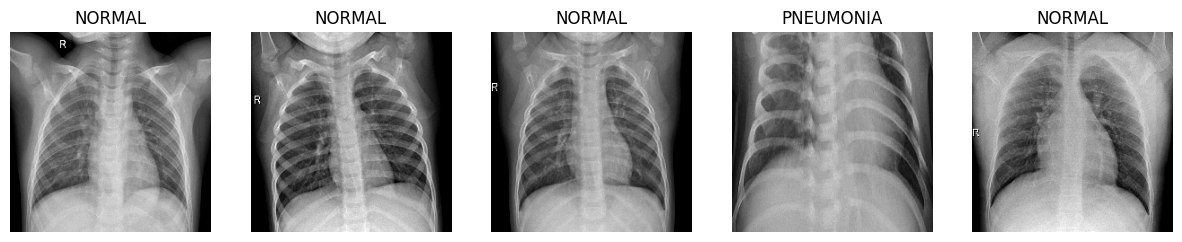


Visualization of balanced training data:


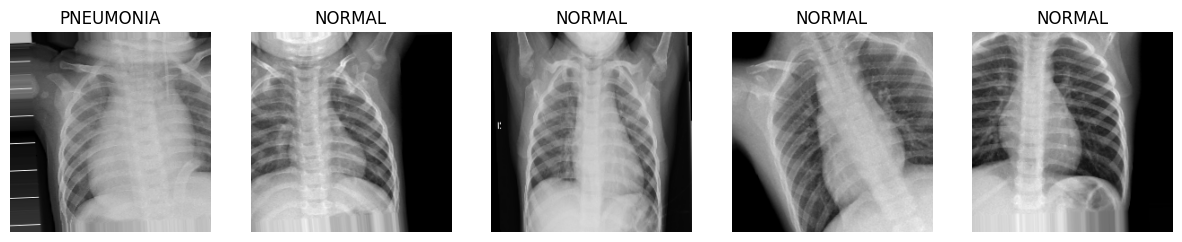

In [131]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Display sample images with labels
def visualize_dataset(generator, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for images, labels in generator:  # Iterate over the generator
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i])
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
        break  # Stop after displaying one batch
    plt.show()

# Define class names
class_names = ['NORMAL', 'PNEUMONIA']

# Visualize training data
print("Visualization of training data:")
visualize_dataset(train_generator, class_names)

# Visualize balanced training data
print("\nVisualization of balanced training data:")
visualize_dataset(train_balanced_generator, class_names)


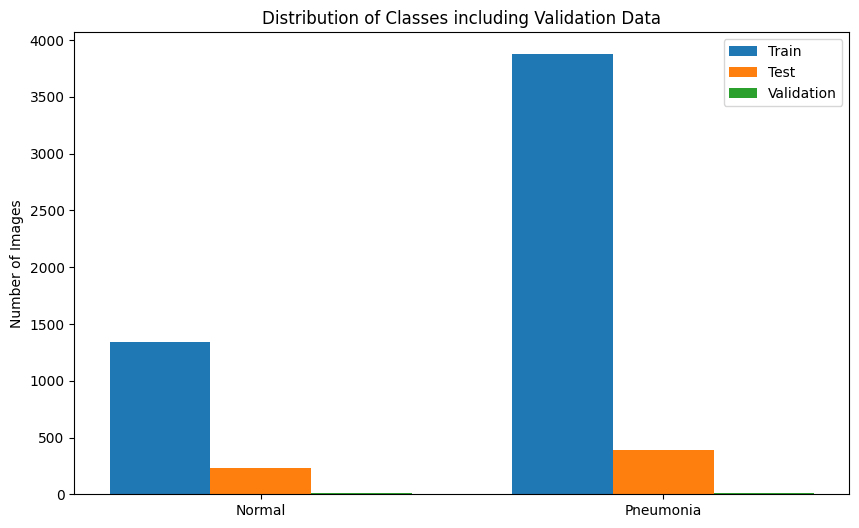

In [132]:


# Count the number of images in each class for the validation set
val_normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))

# Visualize distribution of classes including validation data
labels = ['Normal', 'Pneumonia']
train_counts = [normal_train_count, pneumonia_train_count]
test_counts = [normal_test_count, pneumonia_test_count]
val_counts = [val_normal_count, val_pneumonia_count]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_counts, width, label='Train')
rects2 = ax.bar(x, test_counts, width, label='Test')
rects3 = ax.bar(x + width, val_counts, width, label='Validation')

ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Classes including Validation Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

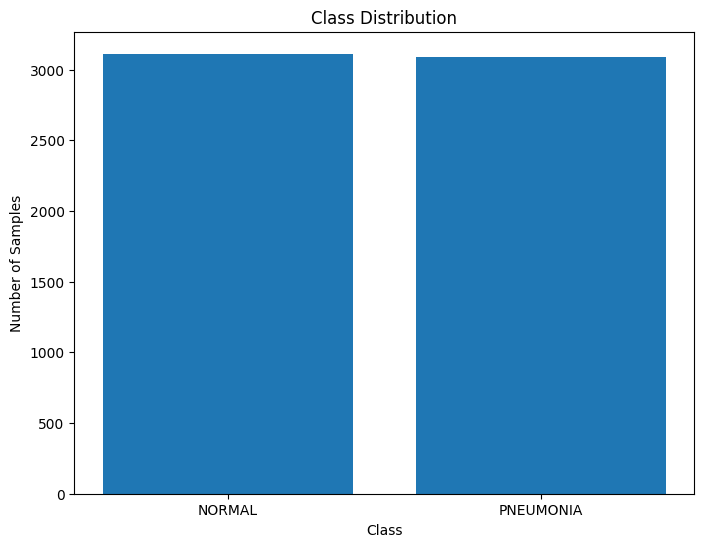

In [133]:
import matplotlib.pyplot as plt

# Function to visualize class distribution
def visualize_class_distribution(generator):
    # Get class indices
    class_indices = generator.class_indices

    # Get class labels and counts
    class_labels = list(class_indices.keys())
    class_counts = generator.classes

    # Get unique class indices
    unique_indices = set(class_indices.values())

    # Count the number of samples for each class
    counts = {label: sum(1 for idx in class_counts if idx == class_indices[label]) for label in class_labels}

    # Plot class distribution
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

# Visualize class distribution for training data
visualize_class_distribution(train_generator)


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3


In [135]:

# Model 1: Convolutional Neural Network (CNN)
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile Model 1 (CNN)  INCRESE LR
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
# Model 1 (CNN)
print("\nModel 1 (CNN):")
# Print model summary
print("\nModel Summary:")
model_cnn.summary()
# Evaluate model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model_cnn.evaluate(test_generator, steps=len(test_generator))
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)


Model 1 (CNN):

Model Summary:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_403 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_404 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_405 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_45 (Ma

In [137]:
# Model 2: InceptionV3
model_inceptionv3 = Sequential([
    InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [138]:
# Compile Model 2 (InceptionV3)
model_inceptionv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [139]:
# Model 2: InceptionV3
print("\nModel 4: InceptionV3")
# Print model summary
print("\nModel Summary:")
model_inceptionv3.summary()
# Evaluate model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model_inceptionv3.evaluate(test_generator, steps=len(test_generator))
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)




Model 4: InceptionV3

Model Summary:
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_24 (Flatten)        (None, 51200)             0         
                                                                 
 dense_56 (Dense)            (None, 128)               6553728   
                                                                 
 dense_57 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28356641 (108.17 MB)
Trainable params: 28322209 (108.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________

Evaluating model on test data...
20/20 [==============================] - 102s 236ms/step - loss: 

In [140]:
# Model 3: Transfer Learning with ResNet50
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_resnet50.layers:
    layer.trainable = False
model_resnet50 = Sequential([
    base_model_resnet50,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [141]:

# Compile Model 3 (Transfer Learning with ResNet50)
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [142]:

# Model 3 (Transfer Learning with ResNet50)
print("\nModel 3 (Transfer Learning with ResNet50):")
# Print model summary
print("\nModel Summary:")
model_resnet50.summary()
# Evaluate model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model_resnet50.evaluate(test_generator, steps=len(test_generator))
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)



Model 3 (Transfer Learning with ResNet50):

Model Summary:
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_25 (Flatten)        (None, 100352)            0         
                                                                 
 dense_58 (Dense)            (None, 128)               12845184  
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36433025 (138.98 MB)
Trainable params: 12845313 (49.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________

Evaluating model on test data...
20/20 [==============================] - 8

In [143]:
# Model 4: Transfer Learning with VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_vgg16.layers:
    layer.trainable = False
model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [144]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with custom layers
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False


In [145]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model_vgg16.compile(optimizer=Adam(lr=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Increase the number of epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)



Epoch 1/10
194/194 [==============================] - 86s 438ms/step - loss: 0.3130 - accuracy: 0.8863 - val_loss: 0.2978 - val_accuracy: 0.8718
Epoch 2/10
194/194 [==============================] - 89s 456ms/step - loss: 0.1716 - accuracy: 0.9402 - val_loss: 0.3545 - val_accuracy: 0.8750
Epoch 3/10
194/194 [==============================] - 84s 433ms/step - loss: 0.1386 - accuracy: 0.9513 - val_loss: 0.2869 - val_accuracy: 0.8910
Epoch 4/10
194/194 [==============================] - 84s 432ms/step - loss: 0.1188 - accuracy: 0.9581 - val_loss: 0.3505 - val_accuracy: 0.8750
Epoch 5/10
194/194 [==============================] - 89s 462ms/step - loss: 0.1072 - accuracy: 0.9627 - val_loss: 0.3692 - val_accuracy: 0.8670
Epoch 6/10
194/194 [==============================] - 87s 447ms/step - loss: 0.1005 - accuracy: 0.9650 - val_loss: 0.3387 - val_accuracy: 0.8798
Epoch 7/10
194/194 [==============================] - 87s 447ms/step - loss: 0.0956 - accuracy: 0.9677 - val_loss: 0.3031 - val_ac

In [146]:
#Model 4 (Transfer Learning with VGG16)
print("\nModel 2 (Transfer Learning with VGG16):")
# Print model summary
print("\nModel Summary:")
model_vgg16.summary()
# Evaluate model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model_vgg16.evaluate(test_generator, steps=len(test_generator))
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)



Model 2 (Transfer Learning with VGG16):

Model Summary:
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 b

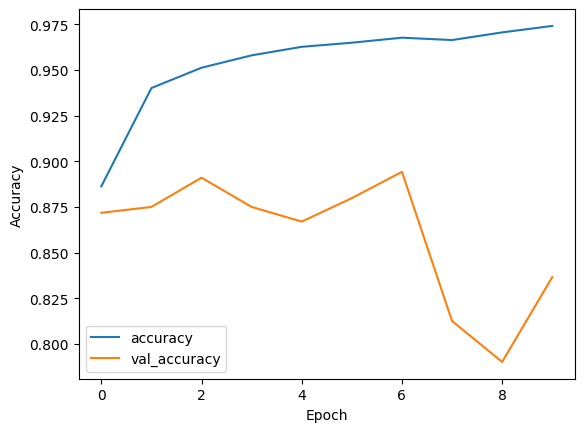

In [147]:



# Visualize the training and validation results
plt.plot(history_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [148]:
# Evaluate the model on the test data
test_loss, test_acc = model_vgg16.evaluate(test_generator, steps=len(test_generator))

# Print the test accuracy
print("Test Accuracy:", test_acc)



20/20 [==============================] - 5s 240ms/step - loss: 0.4890 - accuracy: 0.8365
Test Accuracy: 0.8365384340286255
